In that case study we will try several various models and compare their performance. Let's go!

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset
df = pd.read_csv('telecom_churn.csv')

# EDA part

In [2]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking missing values
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
# Let's have a look at whole dataset
round(df.describe().drop(['Area code'], axis=1, inplace=False),1)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.1,8.1,179.8,100.4,30.6,201.0,100.1,17.1,200.9,100.1,9.0,10.2,4.5,2.8,1.6
std,39.8,13.7,54.5,20.1,9.3,50.7,19.9,4.3,50.6,19.6,2.3,2.8,2.5,0.8,1.3
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.2,33.0,1.0,0.0,0.0,0.0,0.0
25%,74.0,0.0,143.7,87.0,24.4,166.6,87.0,14.2,167.0,87.0,7.5,8.5,3.0,2.3,1.0
50%,101.0,0.0,179.4,101.0,30.5,201.4,100.0,17.1,201.2,100.0,9.0,10.3,4.0,2.8,1.0
75%,127.0,20.0,216.4,114.0,36.8,235.3,114.0,20.0,235.3,113.0,10.6,12.1,6.0,3.3,2.0
max,243.0,51.0,350.8,165.0,59.6,363.7,170.0,30.9,395.0,175.0,17.8,20.0,20.0,5.4,9.0


Text(0.5, 1.0, 'Deployment of customers with (Yes) / without (No) International plan')

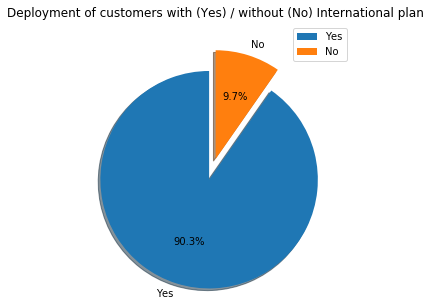

In [7]:
# Deployment of customers with International plan
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df['International plan'].value_counts(), explode = (0.2,0), labels=['Yes', 'No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.title('Deployment of customers with (Yes) / without (No) International plan')

Text(0.5, 1.0, 'Deployment of customers with (Yes) / without (No) Voice mail plan')

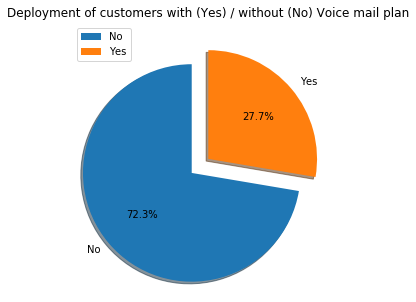

In [8]:
# Deployment of customers with Voice mail plan
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df['Voice mail plan'].value_counts(), explode = (0.2,0), labels=['No', 'Yes'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.title('Deployment of customers with (Yes) / without (No) Voice mail plan')

Text(0.5, 1.0, 'Churn deployment')

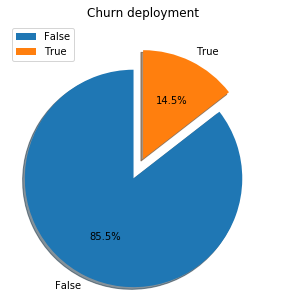

In [9]:
# Deployment of customers who left the company
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df['Churn'].value_counts(), explode = (0.2,0), labels=['False', 'True'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.title('Churn deployment')

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

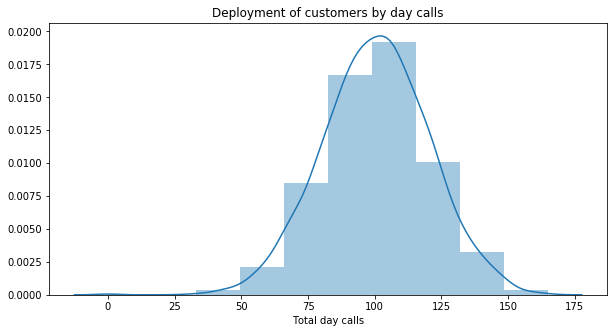

In [10]:
# Deployment of customers by day calls
fig1, ax1 = plt.subplots(figsize=(10,5))
sns.distplot(df['Total day calls'], bins=10)
plt.title('Deployment of customers by day calls')
plt.ylabel

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

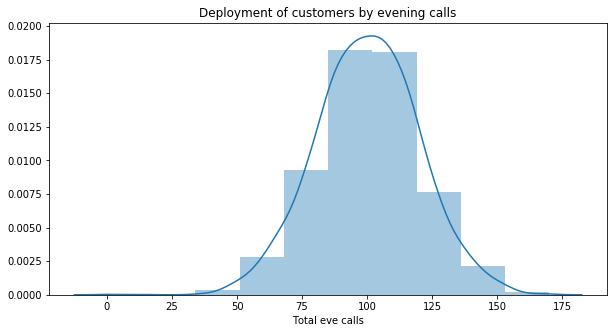

In [11]:
# Deployment of customers by evening calls# 
fig1, ax1 = plt.subplots(figsize=(10,5))
sns.distplot(df['Total eve calls'], bins=10)
plt.title('Deployment of customers by evening calls')
plt.ylabel

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

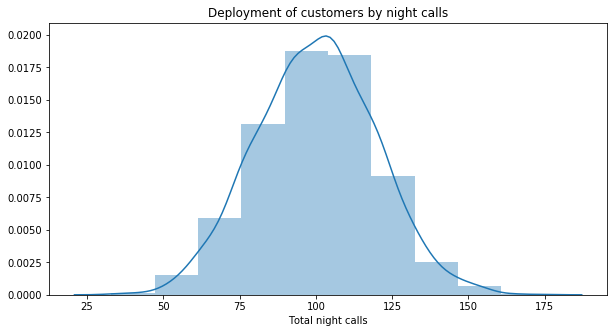

In [12]:
# Deployment of customers by night calls
fig1, ax1 = plt.subplots(figsize=(10,5))
sns.distplot(df['Total night calls'], bins=10)
plt.title('Deployment of customers by night calls')
plt.ylabel

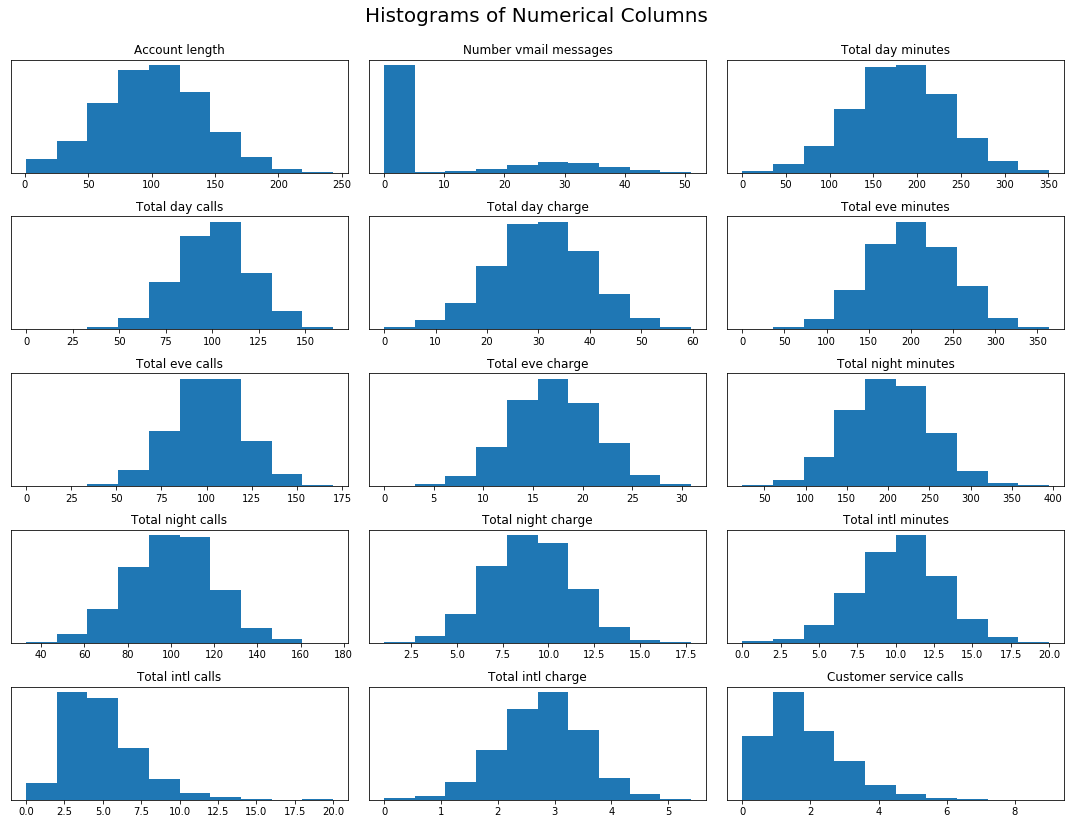

In [13]:
# Histograms of Numerical Columns
dataset = df.drop(columns = ['State','Area code', 'International plan','Voice mail plan', 'Churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(5, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset.columns.values[i - 1])
    plt.hist(dataset.iloc[:, i - 1], bins=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Data Preprocessing part

In [14]:
# Taking care of categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_cols = ['State', 'International plan', 'Voice mail plan', 'Churn']
df[categorical_cols] = df[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
State,16.00,35.00,31.00,35.00,36.00,1.00,19.00,24.00,18.00,49.00
Account length,128.00,107.00,137.00,84.00,75.00,118.00,121.00,147.00,117.00,141.00
Area code,415.00,415.00,415.00,408.00,415.00,510.00,510.00,415.00,408.00,415.00
International plan,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00
Voice mail plan,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
Number vmail messages,25.00,26.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,37.00
Total day minutes,265.10,161.60,243.40,299.40,166.70,223.40,218.20,157.00,184.50,258.60
Total day calls,110.00,123.00,114.00,71.00,113.00,98.00,88.00,79.00,97.00,84.00
Total day charge,45.07,27.47,41.38,50.90,28.34,37.98,37.09,26.69,31.37,43.96
Total eve minutes,197.40,195.50,121.20,61.90,148.30,220.60,348.50,103.10,351.60,222.00


In [15]:
# Let's see the correlation with 'Churn' column
round(df[df.columns[:]].corr()['Churn'][:],3)

State                     0.008
Account length            0.017
Area code                 0.006
International plan        0.260
Voice mail plan          -0.102
Number vmail messages    -0.090
Total day minutes         0.205
Total day calls           0.018
Total day charge          0.205
Total eve minutes         0.093
Total eve calls           0.009
Total eve charge          0.093
Total night minutes       0.035
Total night calls         0.006
Total night charge        0.035
Total intl minutes        0.068
Total intl calls         -0.053
Total intl charge         0.068
Customer service calls    0.209
Churn                     1.000
Name: Churn, dtype: float64

In [16]:
# Let's drop the columns with correlation less then 0.03 - State, Account length and Area code
df.drop(['State', 'Account length', 'Area code'], axis=1, inplace=True)

In [17]:
# Creating DV and IV sets
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

# Models part

We are goinig to test 3 algorithms:
- Random Forest
- Naive Bayes
- Artificial neural network with Keras

For evaluation we will use confusion matrix and classification report. All metrics should be stored in 'sum_met' data frame (summary of meterics).

In [18]:
sum_met = pd.DataFrame(index = ['accuracy'], columns = ['Random_Forest', 'Naive_Bayes', 'Keras_ANN'])

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 123)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

# Saving the accuracy for Random Forest
cl = classification_report(y_test, y_pred)
list_of_words = cl.split()
sum_met.at['accuracy','Random_Forest'] = list_of_words[list_of_words.index('accuracy') + 1]

# Printing the results
print('Confusion matrix:\n',cm)
print('\n','Classification report:\n\n',classification_report(y_test, y_pred))

Confusion matrix:
 [[716   7]
 [ 25  86]]

 Classification report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       723
           1       0.92      0.77      0.84       111

    accuracy                           0.96       834
   macro avg       0.95      0.88      0.91       834
weighted avg       0.96      0.96      0.96       834



Accuracy 96% - Wow!!!

### Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [24]:
# Making the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

# Saving the accuracy for Naive Bayes
cl = classification_report(y_test, y_pred)
list_of_words = cl.split()
sum_met.at['accuracy','Naive_Bayes'] = list_of_words[list_of_words.index('accuracy') + 1]

# Printing the results
print('Confusion matrix:\n',cm)
print('\n','Classification report:\n\n',classification_report(y_test, y_pred))

Confusion matrix:
 [[668  55]
 [ 45  66]]

 Classification report:

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       723
           1       0.55      0.59      0.57       111

    accuracy                           0.88       834
   macro avg       0.74      0.76      0.75       834
weighted avg       0.88      0.88      0.88       834



Accuracy 88%, not bad at all, but worse then Random Forest.

### ANN with Keras

In [25]:
# Importing the Keras libraries and packages
from keras import backend as K
K.tensorflow_backend._get_available_gpus() 
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2499/2499 [==============================] - 1s 573us/step - loss: 0.4457 - acc: 0.8499
Epoch 2/100
2499/2499 [==============================] - 1s 301us/step - loss: 0.4229 - acc: 0.8511
Epoch 3/100
2499/2499 [==============================] - 1s 305us/step - loss: 0.4121 - acc: 0.8511
Epoch 4/100
2499/2499 [==============================] - 1s 302us/step - loss: 0.4107 - acc: 0.8511
Epoch 5/100
2499/2499 [==============================] - 1s 302us/step - loss: 0.4082 - acc: 0.8511
Epoch 6/100
2499/2499 [==============================] - 1s 307us/step - loss: 0.4050 - acc: 0.8511
Epoch 7/100
2499/2499 [==============================] - 1s 304us/step - loss: 0.4020 - acc: 0.8511
Epoch 8/100
2499/2499 [==============================] - 1s 302us/step - loss: 0.3998 - acc: 0.8511
Epoch 9/100
2499/2499 [==============================] - 1s 300us/step - loss: 0

2499/2499 [==============================] - 1s 313us/step - loss: 0.2990 - acc: 0.8868
Epoch 77/100
2499/2499 [==============================] - 1s 312us/step - loss: 0.2889 - acc: 0.8920
Epoch 78/100
2499/2499 [==============================] - 1s 311us/step - loss: 0.2899 - acc: 0.8912
Epoch 79/100
2499/2499 [==============================] - 1s 291us/step - loss: 0.2936 - acc: 0.8848
Epoch 80/100
2499/2499 [==============================] - 1s 290us/step - loss: 0.2989 - acc: 0.8868
Epoch 81/100
2499/2499 [==============================] - 1s 289us/step - loss: 0.2876 - acc: 0.8936
Epoch 82/100
2499/2499 [==============================] - 1s 305us/step - loss: 0.2843 - acc: 0.8952
Epoch 83/100
2499/2499 [==============================] - 1s 303us/step - loss: 0.2929 - acc: 0.8900
Epoch 84/100
2499/2499 [==============================] - 1s 307us/step - loss: 0.2977 - acc: 0.8900
Epoch 85/100
2499/2499 [==============================] - 1s 302us/step - loss: 0.2834 - acc: 0.8936
Epo

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
# Making the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

# Saving the accuracy for Naive Bayes
cl = classification_report(y_test, y_pred)
list_of_words = cl.split()
sum_met.at['accuracy','Keras_ANN'] = list_of_words[list_of_words.index('accuracy') + 1]

# Printing the results
print('Confusion matrix:\n',cm)
print('\n','Classification report:\n\n',classification_report(y_test, y_pred))

Confusion matrix:
 [[709  14]
 [ 71  40]]

 Classification report:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94       723
           1       0.74      0.36      0.48       111

    accuracy                           0.90       834
   macro avg       0.82      0.67      0.71       834
weighted avg       0.89      0.90      0.88       834



Accuracy 90%, not bad at all, but worse then Random Forest as well.

### Conclusion part

For evaluation each model we used confusion matrix and classification report. So let's put all together to see what we've got.

In [28]:
sum_met

,Random_Forest,Naive_Bayes,Keras_ANN
accuracy,0.96,0.88,0.90


So as we can see quite simple and quick algorythm Random Forest showed excellent result.

### Thanks for watching till the end!